# Entry 36 notebook - Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import openml

from sklearn.linear_model import LinearRegression

Create some fake data from the equation $y = mx + b$. $\theta_0$ will be the $b$ term and $\theta_1$ will be the $m$ term. The model that I create should return a coefficient array close to the two terms.

For this example, the intercept (i.e., $\theta_0$ or $b$) is 3 and the slope (i.e., $\theta_1$ or $m$) is 2.5. I'm also throwing in a small error term.

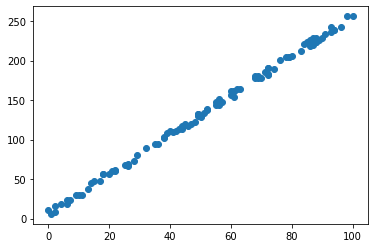

In [101]:
line_X = np.around(np.random.rand(100, 1) * 100, 0)
line_y = np.around(2.5 * line_X + 7 + (np.random.randint(-5, 5, 100).reshape(-1, 1)), 0)
plt.scatter(line_X, line_y)

In [102]:
lin_reg = LinearRegression()
lin_reg.fit(line_X, line_y)
lin_reg.intercept_, lin_reg.coef_

(array([6.88392608]), array([[2.49641982]]))

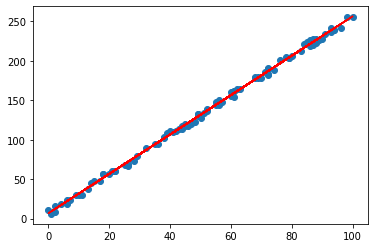

In [126]:
plt.scatter(line_X, line_y)
plt.plot(line_X, lin_reg.coef_[0]*line_X + lin_reg.intercept_, color='red')

To show what happens when linear regression is applied to a nonlinear relationship, I used the same random generation of points for X, then to generate y I cubed X.

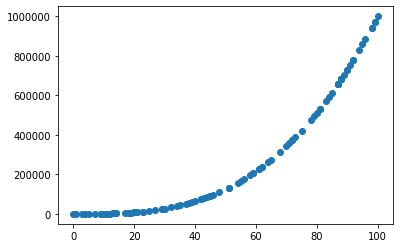

In [128]:
line_X2 = np.around(np.random.rand(100, 1) * 100, 0)
line_y2 = np.around(line_X2**3)
plt.scatter(line_X2, line_y2)

In [129]:
lin_reg2 = LinearRegression()
lin_reg2.fit(line_X2, line_y2)
lin_reg2.intercept_, lin_reg2.coef_

(array([-196434.18077565]), array([[9369.91721242]]))

As can be seen in the graph below using the intercept and slope generated using Linear Regression, this isn't a good predictor for nonlinear relationships.

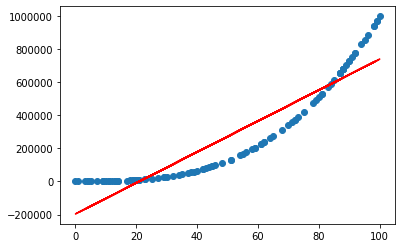

In [130]:
plt.scatter(line_X2, line_y2)
plt.plot(line_X2, lin_reg2.coef_[0]*line_X2 + lin_reg2.intercept_, color='red')

Okay, so now for some real data.

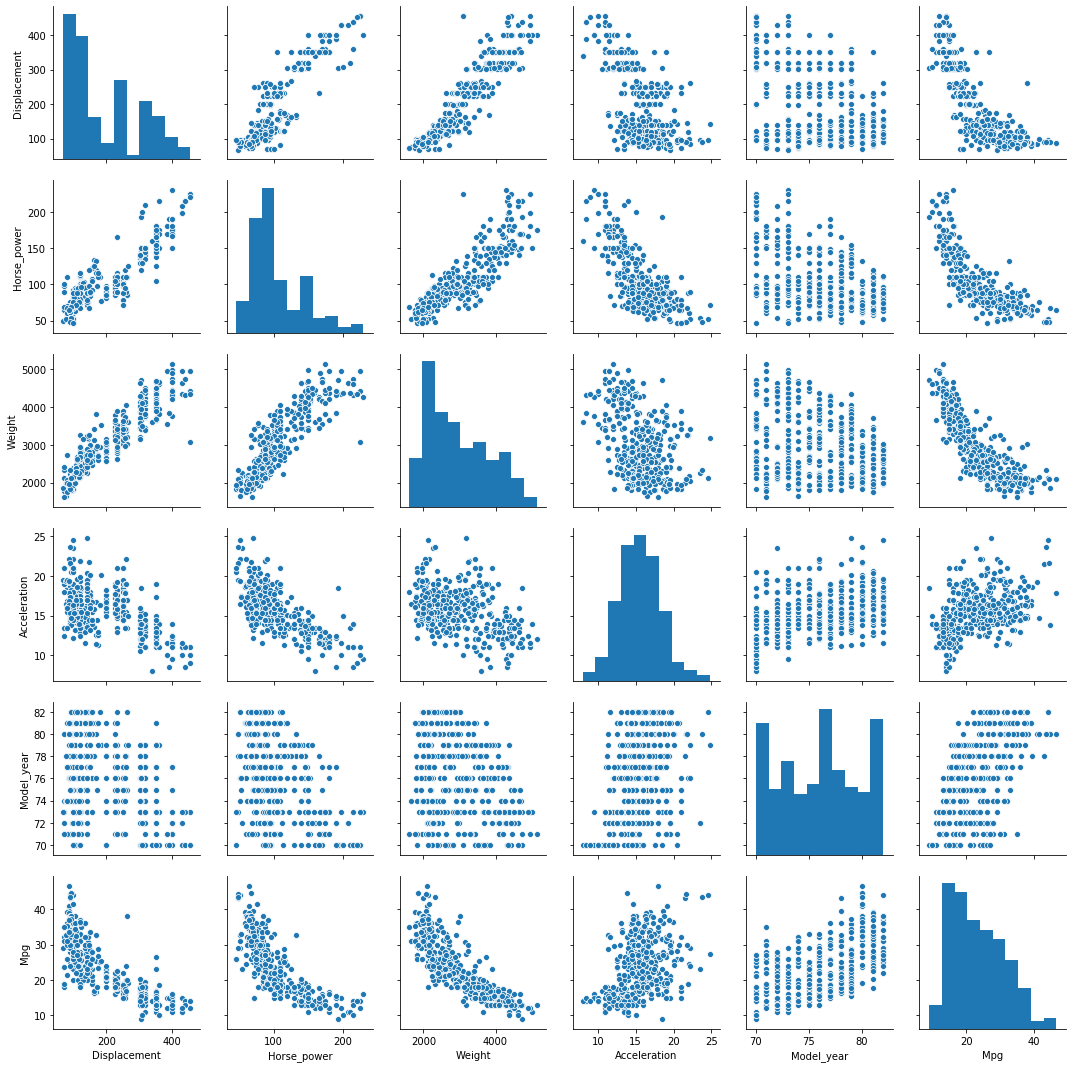

In [2]:
auto_mpg = openml.datasets.get_dataset(42372).get_data()[0]
sns.pairplot(auto_mpg)

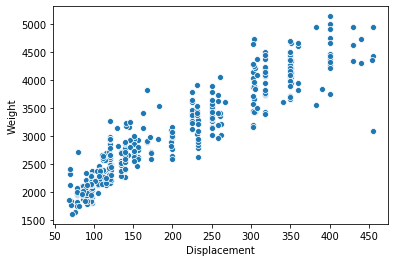

In [7]:
sns.scatterplot('Displacement', 'Weight', data=auto_mpg)

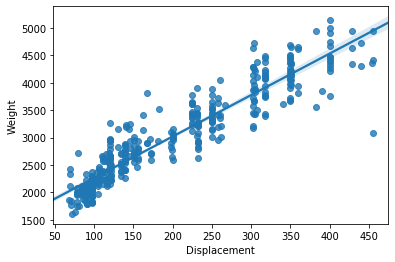

In [8]:
sns.regplot('Displacement', 'Weight', data=auto_mpg)
# sns.lmplot('Displacement', 'Weight', data=auto_mpg)

In [134]:
lin_reg_weight1 = LinearRegression()
lin_reg_weight1.fit(auto_mpg[['Displacement']], auto_mpg[['Weight']])
lin_reg_weight1.intercept_, lin_reg_weight1.coef_

(array([1505.26726916]), array([[7.5731796]]))

Based on the dense vertical lines, there appears to be a pattern or component that's missing which could help with predictive accuracy. I'll work up to measuring predictive power of a model as the notebooks progress.

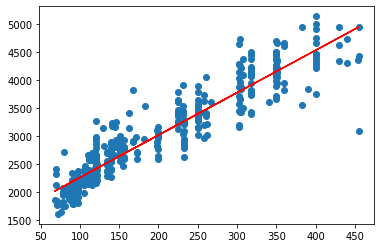

In [135]:
plt.scatter(auto_mpg[['Displacement']], auto_mpg[['Weight']])
plt.plot(auto_mpg[['Displacement']], lin_reg_weight1.coef_[0]*auto_mpg[['Displacement']] + lin_reg_weight1.intercept_, color='red')

Now for something more diffuse.

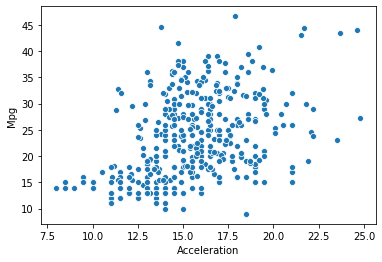

In [138]:
sns.scatterplot('Acceleration', 'Mpg', data=auto_mpg)

In [139]:
lin_reg_mpg = LinearRegression()
lin_reg_mpg.fit(auto_mpg[['Acceleration']], auto_mpg[['Mpg']])
lin_reg_mpg.intercept_, lin_reg_mpg.coef_

(array([4.8332498]), array([[1.19762419]]))

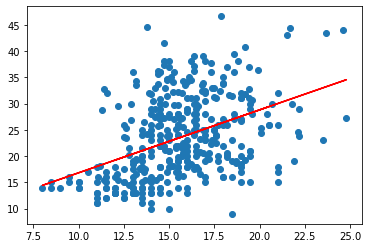

In [140]:
plt.scatter(auto_mpg[['Acceleration']], auto_mpg[['Mpg']])
plt.plot(auto_mpg[['Acceleration']], lin_reg_mpg.coef_[0]*auto_mpg[['Acceleration']] + lin_reg_mpg.intercept_, color='red')

Now for multiple features. The theta array can be shown, but the data can't be visualized on a graph because I'm in 4 dimensions instead of 2 dimensions now.

Based on the below intercept and coefficient values the theta array is:

$\theta$ = [-190.05138066, 5.80608591,  8.55500943, 73.68265835]

In [136]:
lin_reg_weight2 = LinearRegression()
lin_reg_weight2.fit(auto_mpg[['Displacement', 'Horse_power', 'Acceleration']], auto_mpg[['Weight']])
lin_reg_weight2.intercept_, lin_reg_weight2.coef_

(array([-190.05138066]), array([[ 5.80608591,  8.55500943, 73.68265835]]))

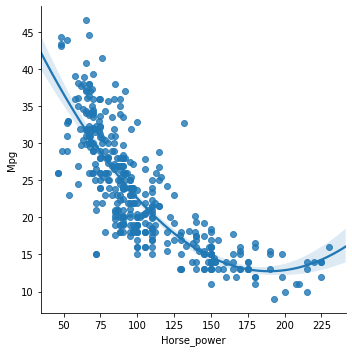

In [6]:
sns.lmplot('Horse_power','Mpg', data=auto_mpg, order=2)